<h1 style="text-align: center;">Banking Customer Churn Analysis and Modelling</h1>






<b>  Problem Statement:</b><br>
    
1. Despite the continuous efforts of banks to attract and retain customers, the banking industry faces a persistent challenge in the form of customer churn, leading to financial losses and reduced customer satisfaction.<br>
2. It is advantageous for banks to know what leads a client towards the decision to leave the company.<br>
    <br>
    
    
<b>Project Objective:-</b>

1. The aim of this project is to analyze the customer churn rate for bank because it is useful to understand why the customers leave.<br>
2. After Analyzing we need to train a Machine Learning Model which can find the key factors that significantly influence the customer churn or attrition.<br>
3. In the end will choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent customers churn.<br>
<br>

<b>  Project Overview:</b><br>

1. <b>Churn refers</b> to customers leaving a bank or discontinuing their banking services.<br>
2. <b>Banking Churn Analysis</b> is a process of studying customer behavior in the banking industry to predict and understand customer attrition or churn.<br>
3. <b>Banking Churn Modeling</b> aims to identify patterns and factors that contribute to customer churn, enabling banks to take proactive measures to retain customers and improve customer satisfaction.<br></div>



<h3 align="left"><font>About the dataset:</font></h3>
    
1. **RowNumber:** It is likely a unique identifier for each record and does not contribute directly to the analysis.
2. **CustomerId:** It can be used to track and differentiate individual customers within the dataset.
3. **Surname:** It provides information about the family name of each customer.
4. **CreditScore:** It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
5. **Geography:** It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
6. **Gender:** It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.
7. **Age:** It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
8. **Tenure:** It typically represents the number of years or months the customer has been associated with the bank.
9. **Balance:** It reflects the amount of money in the customer's bank account at a specific point in time.
10. **NumOfProducts:** It can include various offerings such as savings accounts, loans, credit cards, etc.
11. **HasCrCard:** It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
12. **IsActiveMember:** It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
13. **EstimatedSalary:** It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.
14. **Exited:** It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

# Step 1 :  Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

%matplotlib inline

# Step 2 : Reading the data

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv.xls")

# Step 3 : Examining the data for better understanding

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
print("Total number of rows present in the dataset is:",df.shape[0])
print("Total number of columns present in the dataset is:",df.shape[1])

Total number of rows present in the dataset is: 10000
Total number of columns present in the dataset is: 14


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Step 4 : Check datatypes and null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0



<h3 align="left"><font>Inference:</font></h3>
    
1. **NULL values:** No null values in dataset
2. **Datatypes:** 11 numerical columns and 3 categorical columns



# Step 5 : Check for duplicate rows in the dataset

In [8]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited




<h3 align="left"><font>Inference:</font></h3>
    
1. **Duplicate rows:** No Duplicate Rows

# Step 6 : Descriptive statistical analysis on Categorical columns

In [9]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457




<h3 align="left"><font>Inference:</font></h3>
    
1. **Surname Column:** Surname column does not contribute for churn prediction, and it also has high cardinality (unique values ), so remove the column.
1. **Geography and Gender Column:** In this domain, gender and geography play a huge role while performing churn analysis. So, they are highly important.

# Step 7 : Data wrangling

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




<h3 align="left"><font>Inference:</font></h3>
    
1. **Identifying insignificant features:** Row number, Customer ID and Surname are just numbers assigned to differentiate between customers and dont play any role in helping with the process of training the algorithm for churn predction.


In [11]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True) # Dropping columns

In [12]:
df.rename(columns={"Exited":"Churned"},inplace=True) # rename for Exploratory data analysis
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No



<h3 align="left"><font>Inference:</font></h3>
    
1. **Raw form to well-structured data:** Exploratory data analysis can be done better and insights can be drawn.

# Step 8 : Exploratory Data Analysis

## Step 8.1 Visualising Target Vairable

Text(0.5, 1.0, 'Customer Churned Disribution')

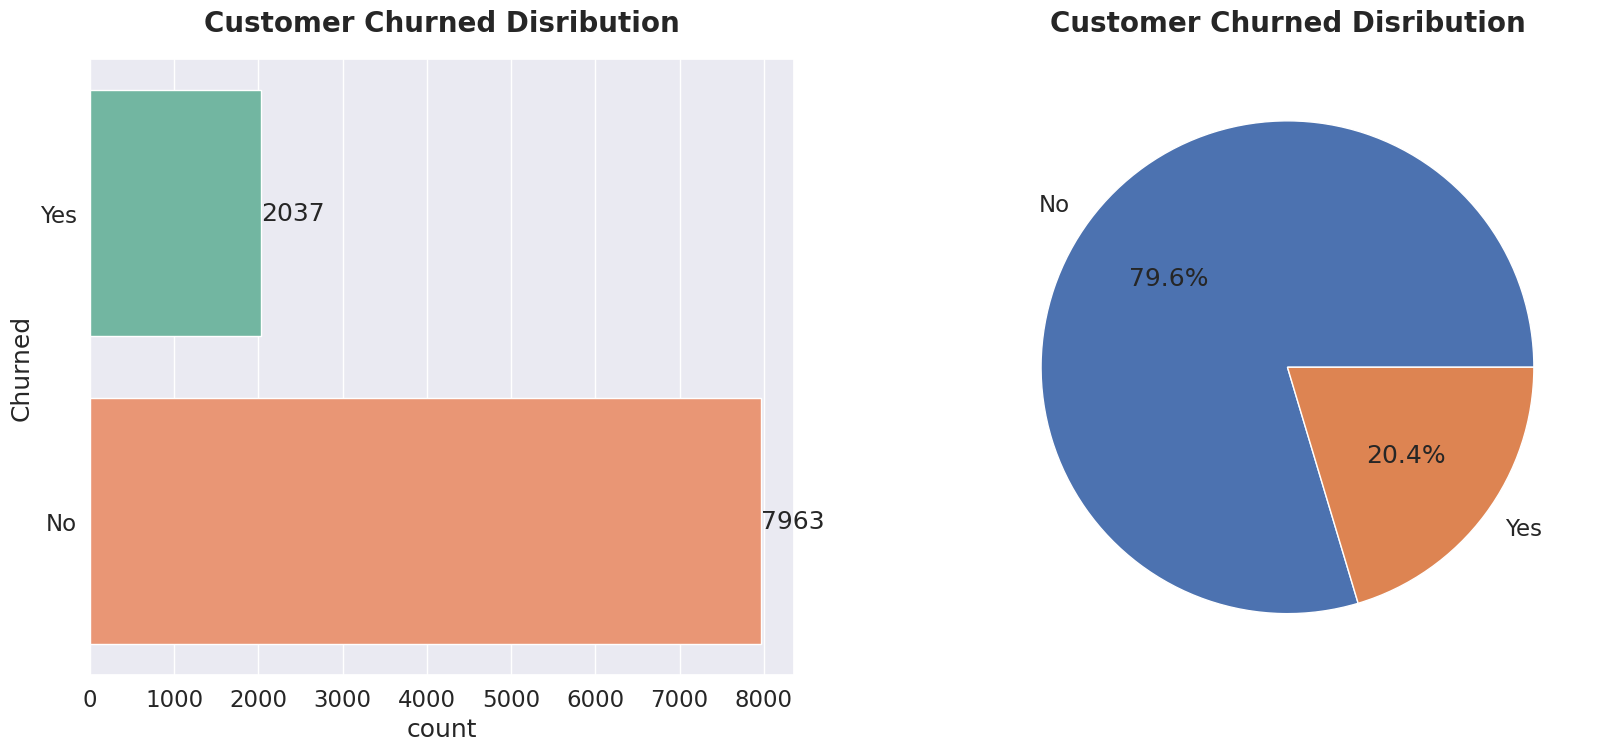

In [14]:
count = df["Churned"].value_counts()

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"))
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)



<h3 align="left"><font>Inference:</font></h3>
    
1. **Class Imbalance:** There is a huge imbalance of classes, which may lead to biased predictions on majority class, that is "NOT CHURNED" class
2. **Oversampling with SMOTE:** The number of minority classes is increased using the Synthetic Minority Oversampling Technique (SMOTE)

## Step 8.2 : Visualizing Customer churned by gender

In [15]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage,(x,y))

    plt.title(f"Customer Churned by {column}")

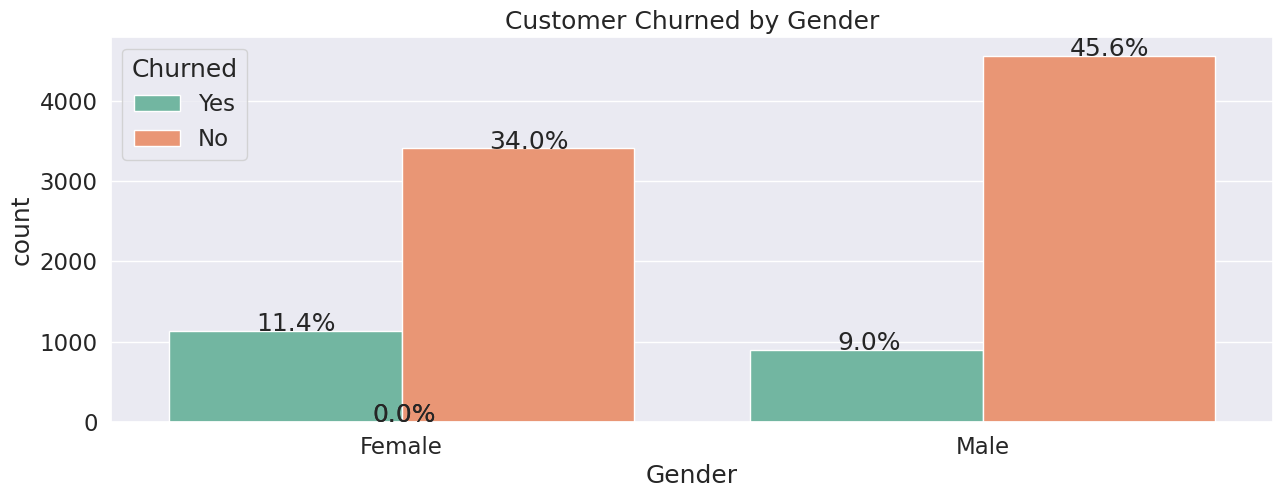

In [16]:
countplot("Gender")



<h3 align="left"><font>Inference:</font></h3>
    
1. **More Female customers churned:** Female customers
have higher churn rates than male customers. So, female customers have deactivated their banking facilities more than male customers.



<h3 align="left"><font>Recommendation:</font></h3>
    
1. **Targeted Marketing Campaign:** Bank is advised to focus on marketing campaigns tailored to female customers
2. **Improve customer experience:** Understand how to improve the customer experience of female customers

## Step 8.3 : Visualizing customers churned by Geographical Region

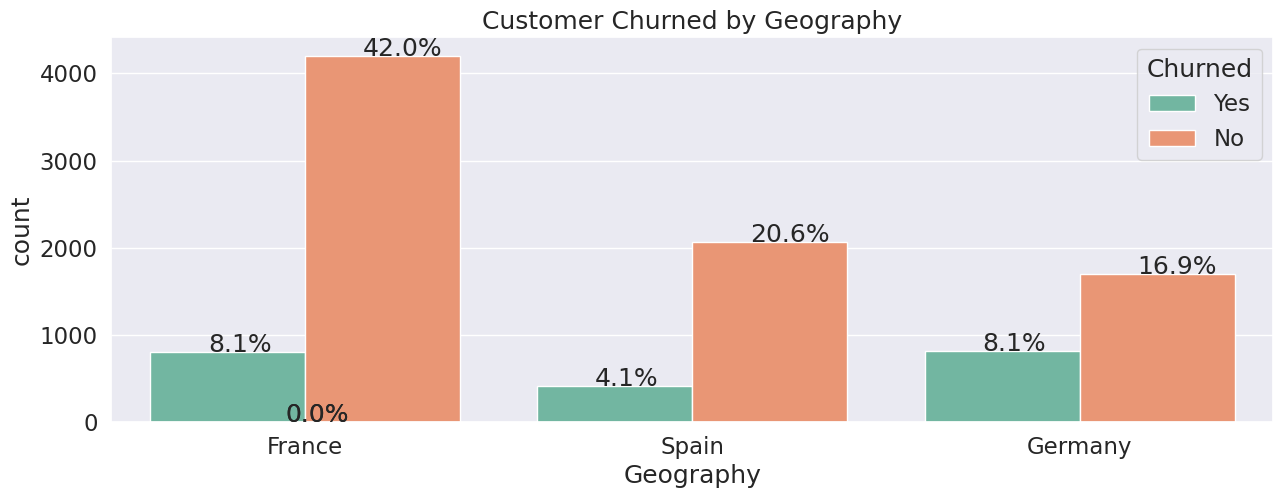

In [17]:
countplot("Geography")


<h3 align="left"><font>Inference:</font></h3>
    
1. **Germany and France** : Germany despite having less customers than France, it has the same churn rate as Germany.
1. **German churn issue** :  Despite having the same customers as Spain, Germany has double the churn rate than spain.



<h3 align="left"><font>Recommendation:</font></h3>
    
1. **Replicate France strategy** : It is advised to follow the same banking facilities and behaviour of France in Germany because France has almost the same churn rate despite having nearly double the customers than germany.

## Step 8.4 : Visualize Customer Churn by "HasCrCard"

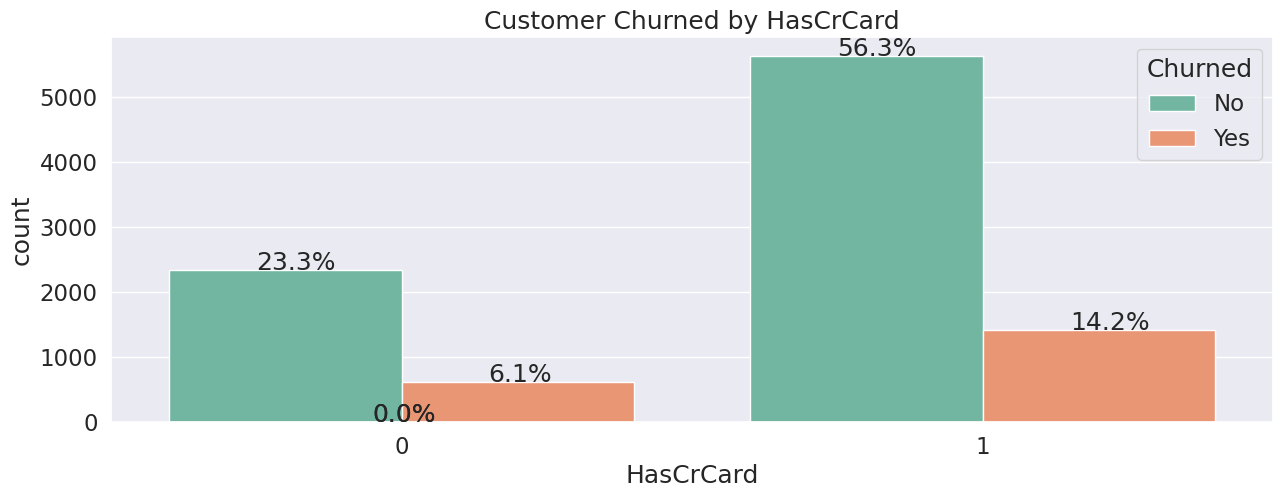

In [18]:
countplot("HasCrCard")



<h3 align="left"><font>Inference:</font></h3>
    
1. **Credit card does not affect churn rate** :  Nearly 70% people had credit card and for every 1 customer churned, almost 4 customers did not churn, so credit card is not affecting churn rate.

## Step 8.5 : Visualizing customer by "NumOfProducts"

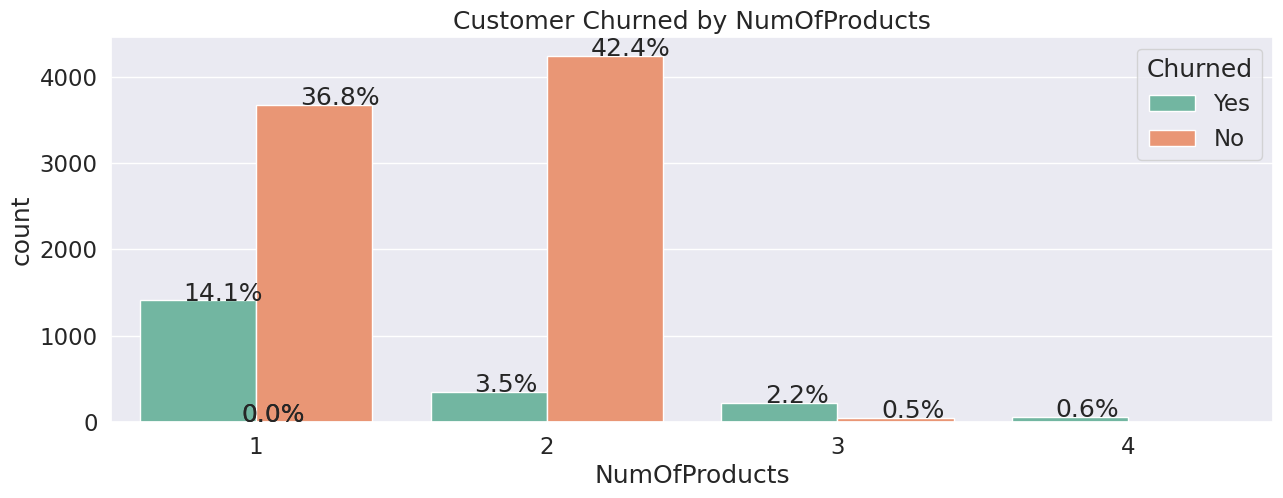

In [19]:
countplot('NumOfProducts')



<h3 align="left"><font>Inference:</font></h3>
    
1. **Majority** : Almost 97% customers only had 1 or 2 products
2. **lowest churn rate** : When customers had 2 products, the churn rate was the lowest
3. **Very high churn rate** : When customers had 1 or 2+ products
4. **Feature engineering** : Combine the customers having atleat 2 products into one group to reduce class imbalance, because it may lead to biased predictions.



<h3 align="left"><font>Recommendations:</font></h3>
    
1. **Push for atleast 2 products** : Its advised to sell atleast 2 products to customers to have reduced churn rate.
1. **Provide incentives** :  Give incentives for customers to take atleast 2 products


## Step 8.6 : Visualizing customers churned by "IsActiveMember"

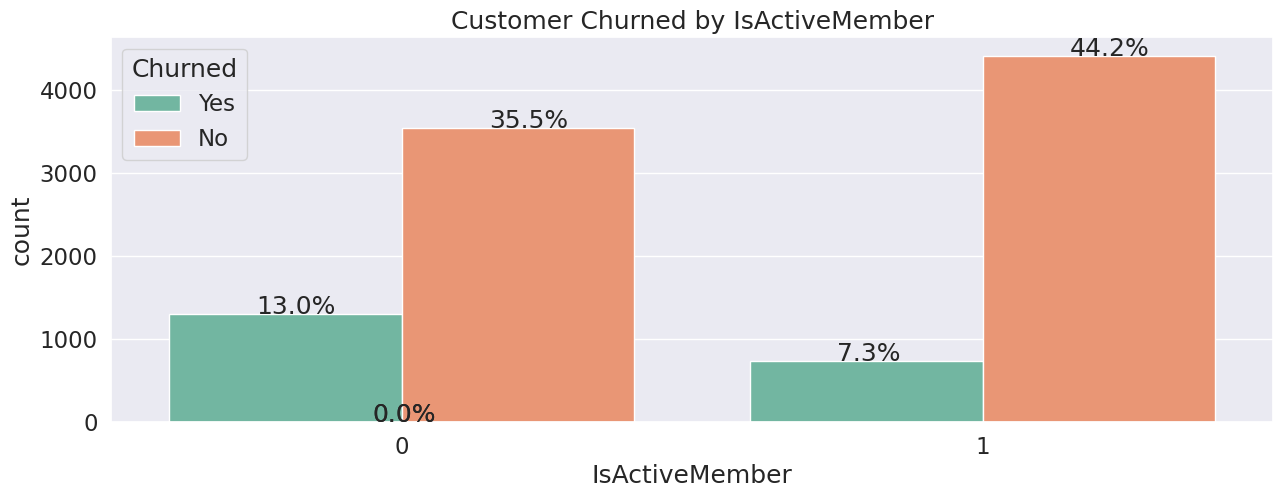

In [20]:
countplot("IsActiveMember")


<h3 align="left"><font>Inference:</font></h3>
    
1. **Almost equal data** : There is almost equal data on active and inactive customers
2. **Inactive members** :  Despite having same number of active and inactive members, chur rate of inactive is double than active members. So, inactive members are most likely to churn.


<h3 align="left"><font>Recommendation:</font></h3>
    
1. **Regular communication** : The banks can reguarly communicate and update regarding banks products, and Enhanced digital services to keep the custoemr active with the banking facilities.


## Step 8.7 Visualizing customers churn by "Tenure"

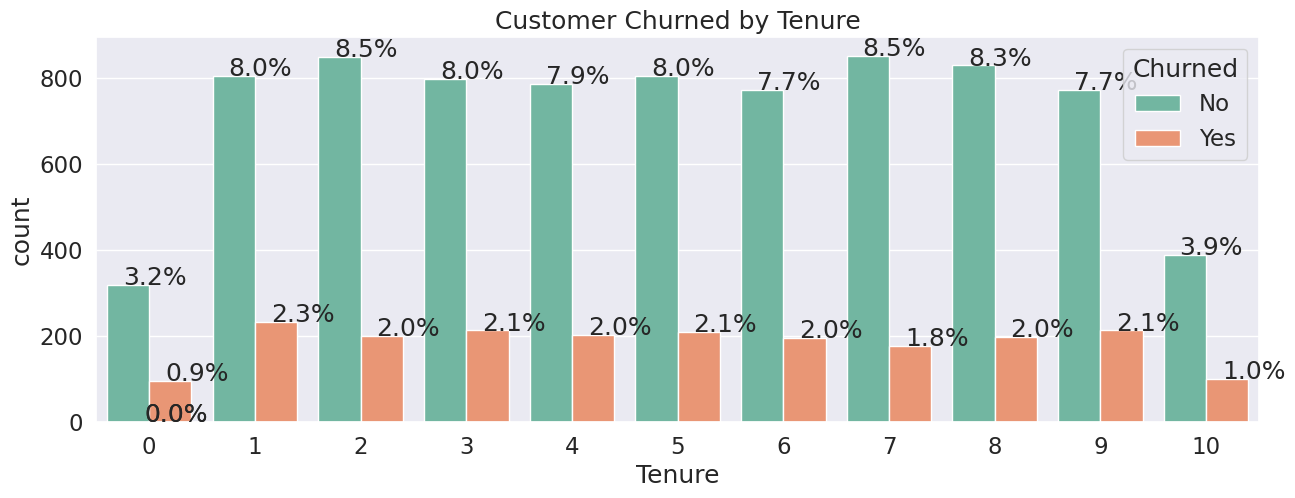

In [21]:
countplot("Tenure")


<h3 align="left"><font>Inference:</font></h3>
    
1. **No effect** : The distribution of churn rates is almost similar, so cannot draw any inference.


## Step 8.8 :  Visualizing customers churned by "CreditScore"

In [22]:
def continuous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status")

    plt.subplot(1,2,2)
    sns.boxplot(x="Churned",y=column,data=df,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status")
    plt.tight_layout()
    plt.show()

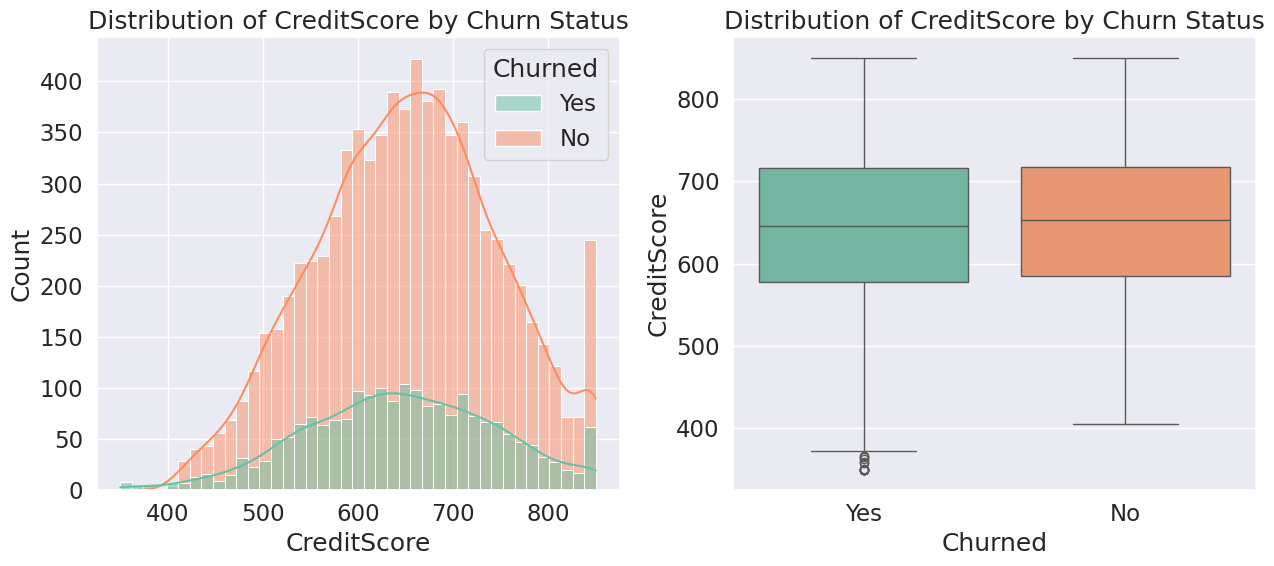

In [23]:
continuous_plot("CreditScore")



<h3 align="left"><font>Inference:</font></h3>
    
1. **Median credit score** : The Median credit score for both churned and unchurned remain same. Could not draw any inference.

## Step 8.9 Visualizing customers by age

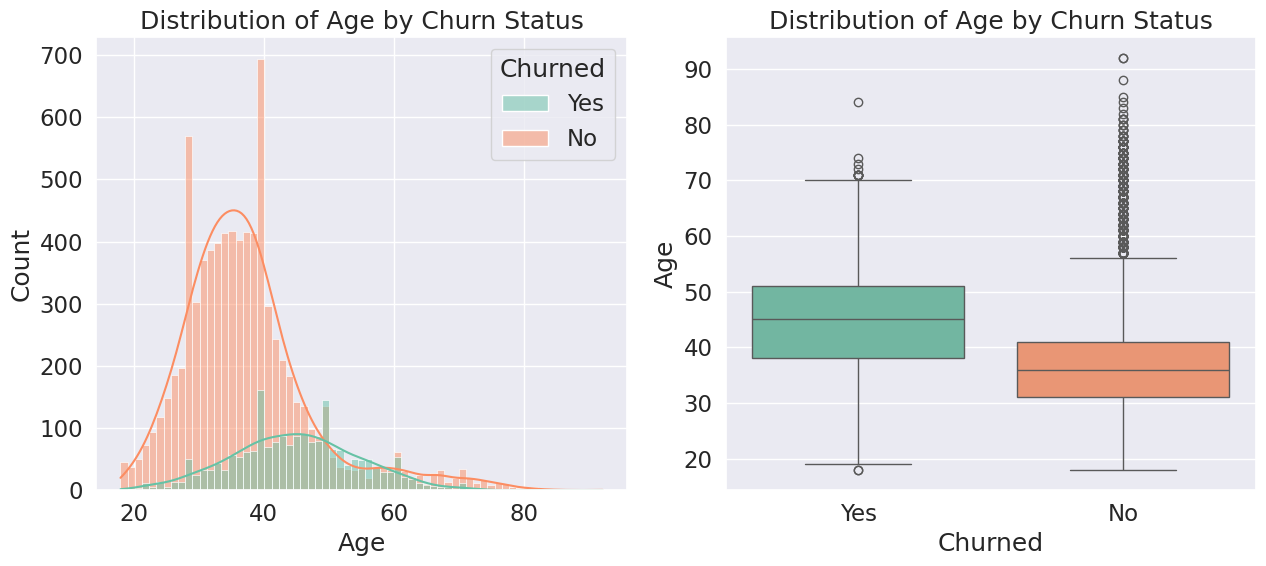

In [24]:
continuous_plot("Age")



<h3 align="left"><font>Inference:</font></h3>
    
1. **Right skewed** : The distribution is right skewed, which may cause overfitting. So, apply log normal transformation during Feature Engineering, which will transform Age to normal distribution

## Step 8.10 Visualizing customer churned by Balance

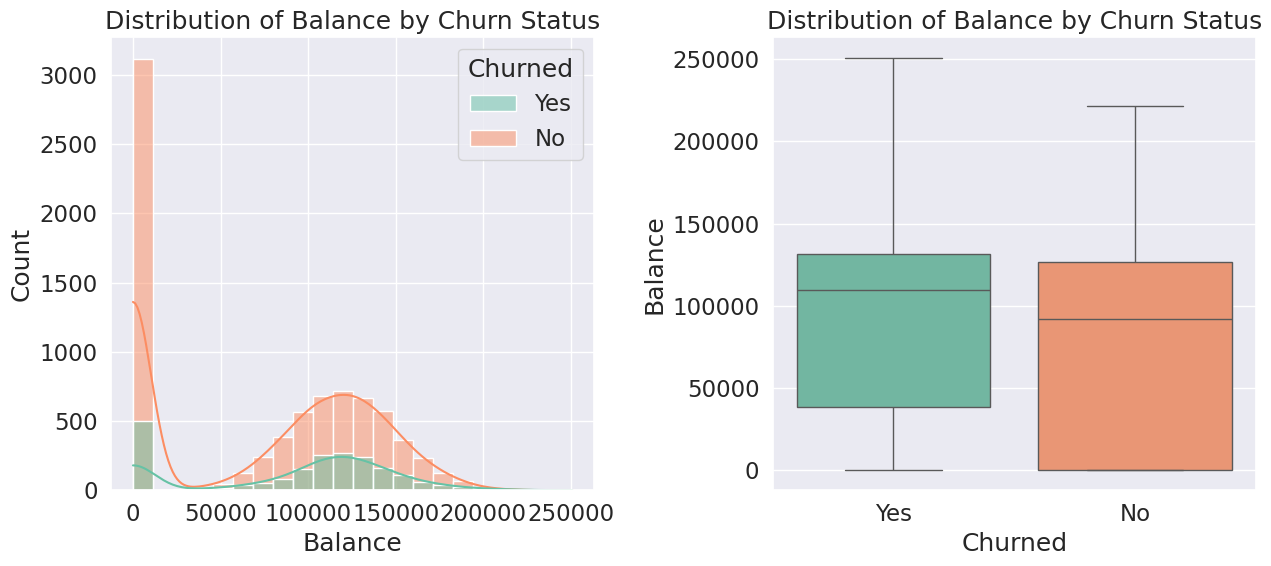

In [25]:
continuous_plot("Balance")



<h3 align="left"><font>Inference:</font></h3>
    
1. **Zero balance customers** : zero balance customers are more likely to churn.
2. **Many zero balance customers** : More than 3000 customers have zero balance
3. **Normal distribution except zero balance** : Excluding zero balance, there is normal distribution. So, while featue engineering, group the zero balance customers and others seperately.

## step 8.11 : Visualizing customers by expected salary

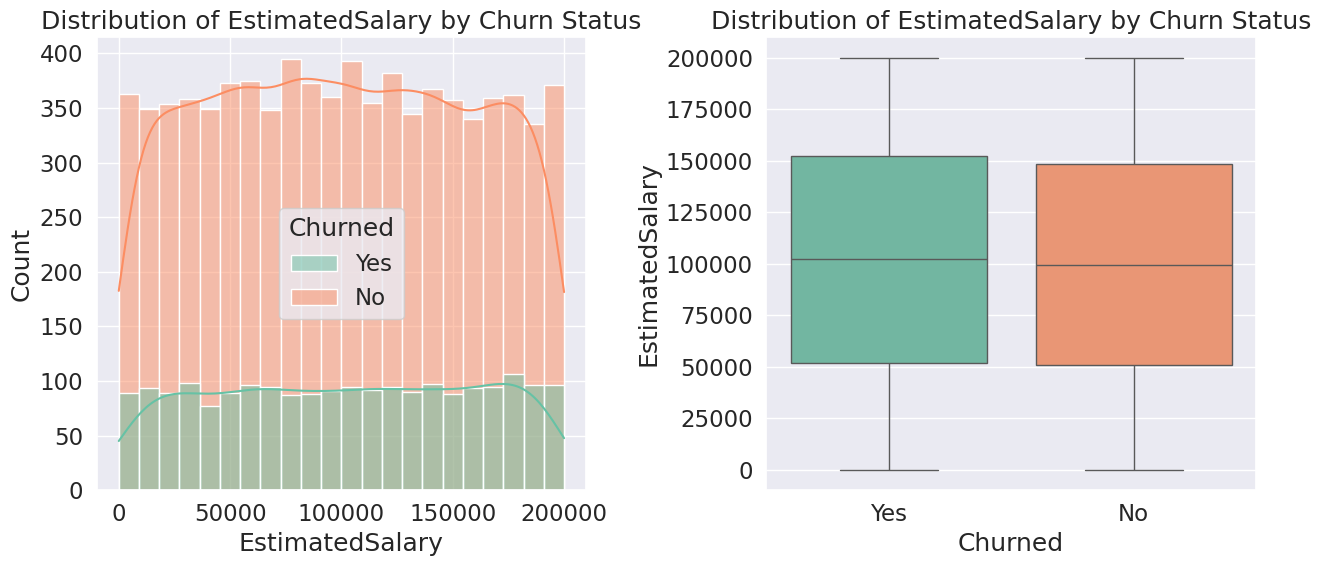

In [26]:
continuous_plot("EstimatedSalary")



<h3 align="left"><font>Inference:</font></h3>
    
1. **Distribution and Median similar** : Cannot make any inference

# Step 9 :Feature Engineering

## Step 9.1 Creating new Feature from "NumOfProducts" Feature

In [27]:
df["Total_Products"]=df['NumOfProducts'].map({1:"One Product",2:"Two Products"})


In [28]:
df['Total_Products']=df['Total_Products'].replace({np.nan:'More than 2 products'})

In [29]:
df.drop(columns='NumOfProducts',inplace=True)

In [30]:
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products
9995,771,France,Male,39,5,0.00,1,0,96270.64,No,Two Products
9996,516,France,Male,35,10,57369.61,1,1,101699.77,No,One Product
9997,709,France,Female,36,7,0.00,0,1,42085.58,Yes,One Product
9998,772,Germany,Male,42,3,75075.31,1,0,92888.52,Yes,Two Products
9999,792,France,Female,28,4,130142.79,1,0,38190.78,No,One Product


### Step 9.1.1 Visualizing new feature "Total_Products"

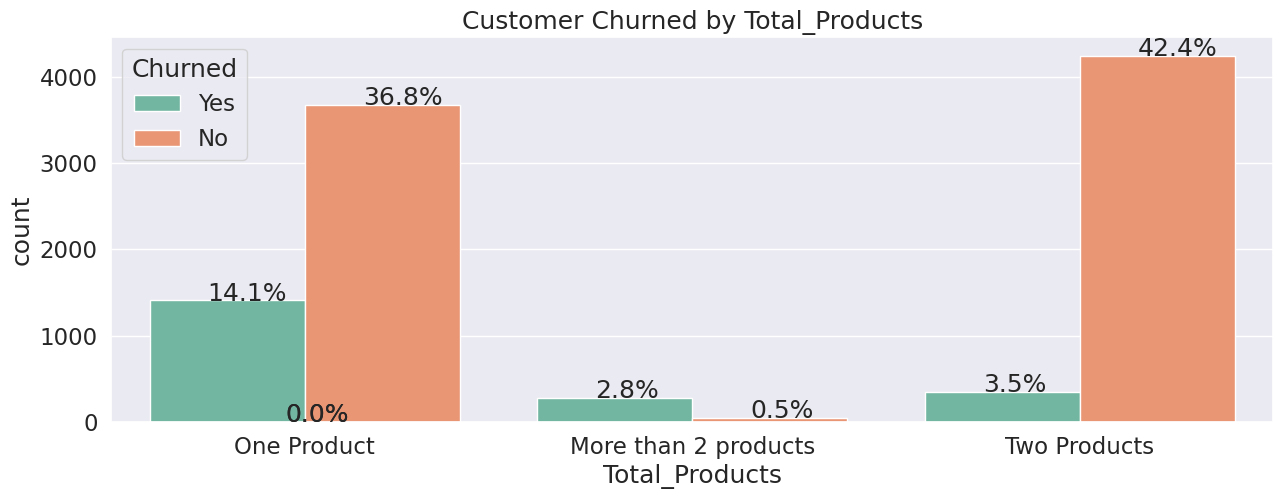

In [31]:
countplot("Total_Products")

# Step 9.2 creating new feature from "Balance"

In [32]:
def balance_mapper(col):
  if col==0:
    return str('Zero Balance')
  else:
    return str('More than zero balance')

df['Account_Balance']=df['Balance'].apply(balance_mapper)

In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,France,Female,42,2,0.00,1,1,101348.88,Yes,One Product,Zero Balance
1,608,Spain,Female,41,1,83807.86,0,1,112542.58,No,One Product,More than zero balance
2,502,France,Female,42,8,159660.80,1,0,113931.57,Yes,More than 2 products,More than zero balance
3,699,France,Female,39,1,0.00,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,No,One Product,More than zero balance


In [34]:
df.drop(columns='Balance',inplace=True)

### Step 9.3.1 Visualising the new feature

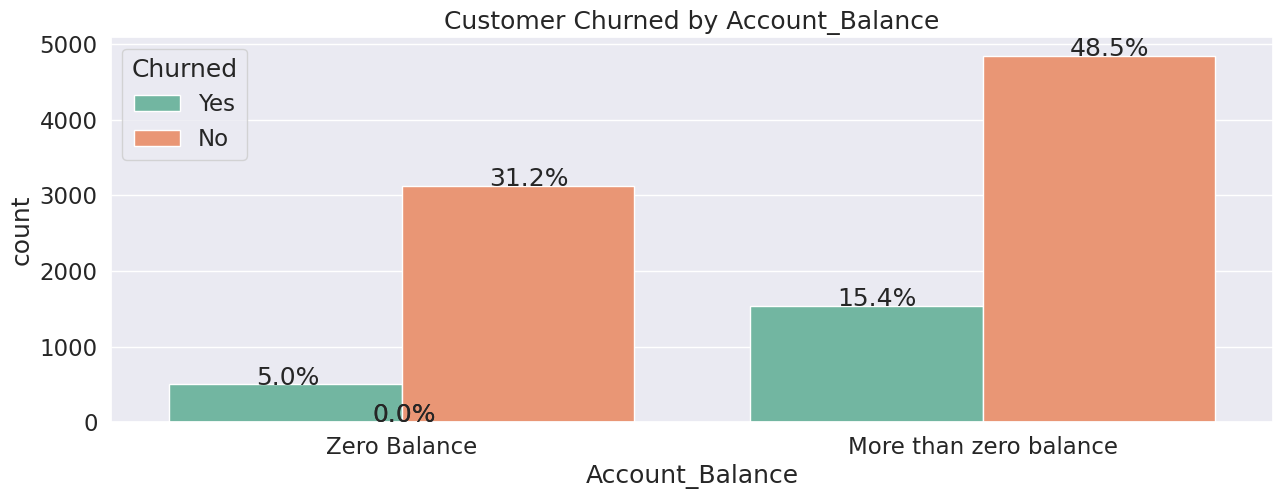

In [35]:
countplot('Account_Balance')

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Total_Products,Account_Balance
0,619,France,Female,42,2,1,1,101348.88,Yes,One Product,Zero Balance
1,608,Spain,Female,41,1,0,1,112542.58,No,One Product,More than zero balance
2,502,France,Female,42,8,1,0,113931.57,Yes,More than 2 products,More than zero balance
3,699,France,Female,39,1,0,0,93826.63,No,Two Products,Zero Balance
4,850,Spain,Female,43,2,1,1,79084.10,No,One Product,More than zero balance


# Step 10 : Data Preprocessing

## Step 10.1 Unique values in category column

In [37]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())


Unique Values in Geography column is: ['France' 'Spain' 'Germany']
Unique Values in Gender column is: ['Female' 'Male']
Unique Values in Total_Products column is: ['One Product' 'More than 2 products' 'Two Products']
Unique Values in Account_Balance column is: ['Zero Balance' 'More than zero balance']


### Step 10.2 Performing one hot encoding for categorical variables

In [38]:
df = pd.get_dummies(columns=cat_cols, data=df)

In [39]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More than 2 products,Total_Products_One Product,Total_Products_Two Products,Account_Balance_More than zero balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,Yes,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,No,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,Yes,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,No,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,No,False,False,True,True,False,False,True,False,True,False


## Step 10.3 Encoding Target Variable

In [40]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [41]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More than 2 products,Total_Products_One Product,Total_Products_Two Products,Account_Balance_More than zero balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,True,False,False,True,False,False,True,False,False,True
1,608,41,1,0,1,112542.58,0,False,False,True,True,False,False,True,False,True,False
2,502,42,8,1,0,113931.57,1,True,False,False,True,False,True,False,False,True,False
3,699,39,1,0,0,93826.63,0,True,False,False,True,False,False,False,True,False,True
4,850,43,2,1,1,79084.10,0,False,False,True,True,False,False,True,False,True,False


## Step 10.4 : Check Skewness of continuous variable

In [42]:
cols = ["CreditScore","Age","EstimatedSalary"]

In [43]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085



<h3 align="left"><font>Inference:</font></h3>
    
1. **Age has positive skewness** : Age is highly right skewed, which conveys the presence of outliers on the right tail.
2. **Negative Impact** : Skewness can negatively impact the performance of machine learning algorithms like Decision Tree and Linear Regression
3. **Transform Age to normal distribution** : Use Log Normal tramsformation to convert right skewed distribution to Normala distribution


## Step 10.5 : Perform Log transformation on Age column

In [44]:
old_age = df["Age"]     ## stores the old age column for comparison with new age column

In [45]:
df["Age"] = np.log(df["Age"]) # Applying log transformation

## Step 10.6 : Visualizing age before and after transformation

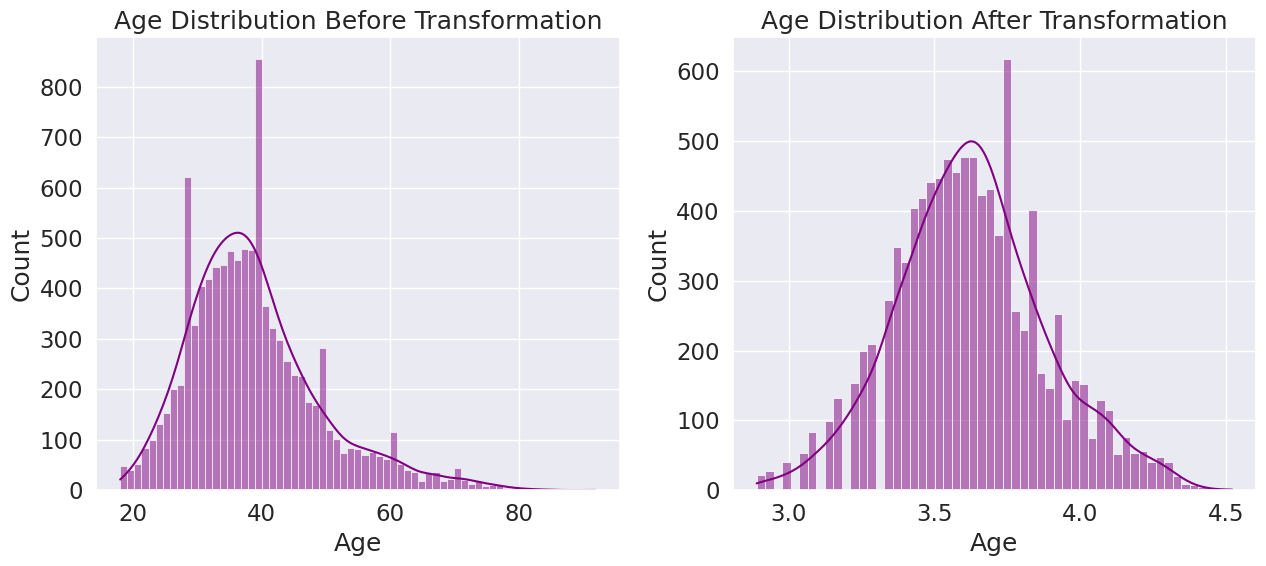

In [46]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation")

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation")
plt.tight_layout()
plt.show()


<h3 align="left"><font>Inference:</font></h3>
    
1. **Achieved normal distribution on age column** : After applying log transformation, the age column has been converted to normal distribution.

# Step 10.6 : Segregating Features and Labels for Model Training

In [47]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

# Step 11 : Splitting Training and Test data

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)




<h3 align="left"><font>Inference:</font></h3>
    
1. **Two phases** : Training phase and Testing phase only. Hyperparameters are tuned using crossvalidation on training phase.

# Step 12 : Decision Tree Classification model

## Step 12.1 Model and hyperparameters

In [50]:
dtree = DecisionTreeClassifier()

param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

## Step 12.2 SMOTE for balancing classes in target variable


In [51]:
smt = SMOTE(random_state=42)

In [52]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [53]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 16) (12736,)


In [54]:
y_train_resampled.value_counts().to_frame()

,count
Churned,
0,6368
1,6368



<h3 align="left"><font>Inference:</font></h3>
    
1. **Classes balanced** : Prediction will not be biased anymore.

## Step 12.3 Hyperparameter Tuning

In [55]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

## Step 12.4 Fetching the best hyperparameters


In [56]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'random_state': 0,
 'splitter': 'random'}

## Step 12.5 Creating Decision tree model using best hyperparameters

In [57]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=0,
                       splitter='random')

## Step 12.6 Compute model accuracy

In [58]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 89.85 %
Accuracy Score of Model on Testing Data  is => 83.65 %


## Step 12.7 Model evaluation with different metrics

In [59]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8365
Recall Score of the Model is => 0.8365
Precision Score of the Model is => 0.8365


In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1595
           1       0.60      0.58      0.59       405

    accuracy                           0.84      2000
   macro avg       0.75      0.74      0.74      2000
weighted avg       0.83      0.84      0.84      2000




<h3 align="left"><font>Inference:</font></h3>
    
1. **High F1 Score** : This indicates that the model gives a good performance in Recall and Precision

# Step 12.8 Finding Importance of features in a decision tree classifier

In [61]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

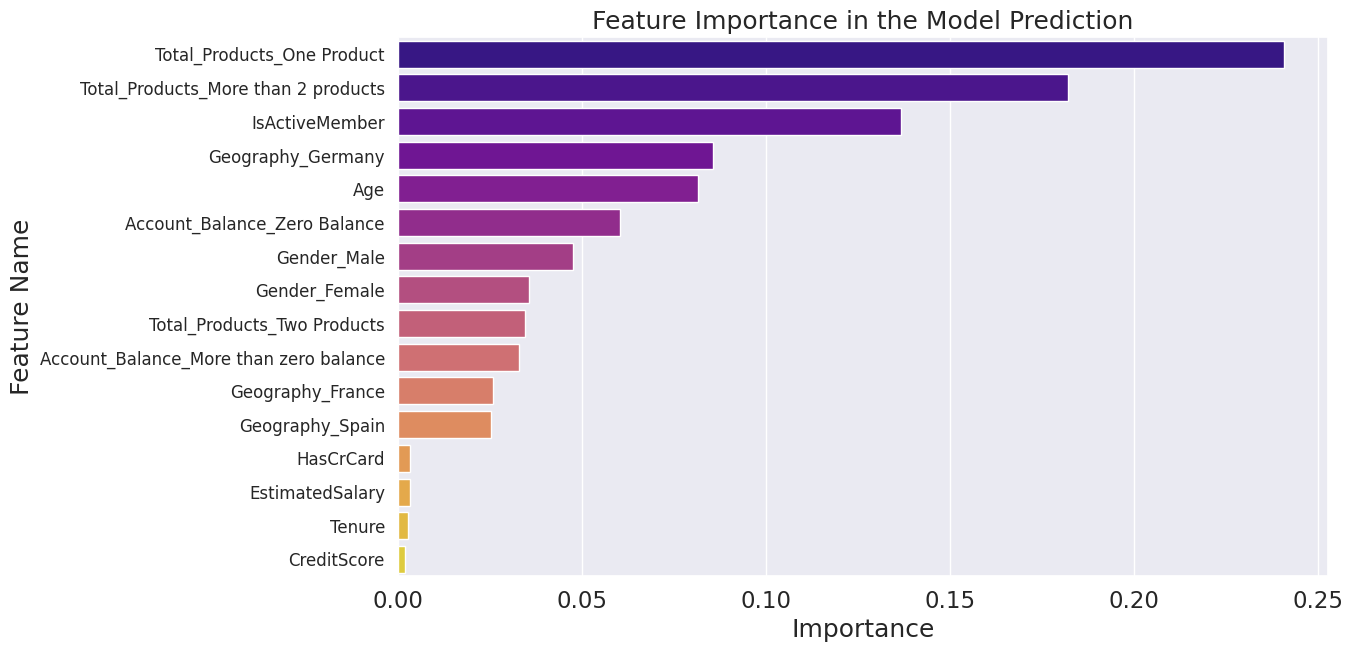

In [62]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction")
plt.yticks(size=12)
plt.show()


<h3 align="left"><font>Inference:</font></h3>
    
1. **Most Influential features** : Total_products, Age, IsActiveMember, Geography and Gender.
2. **Least Influential features** : CreditScore,HasCrCard,Tenure and EstimatedSalary

# Step 12.11 Model Evaluation using confusion matrix

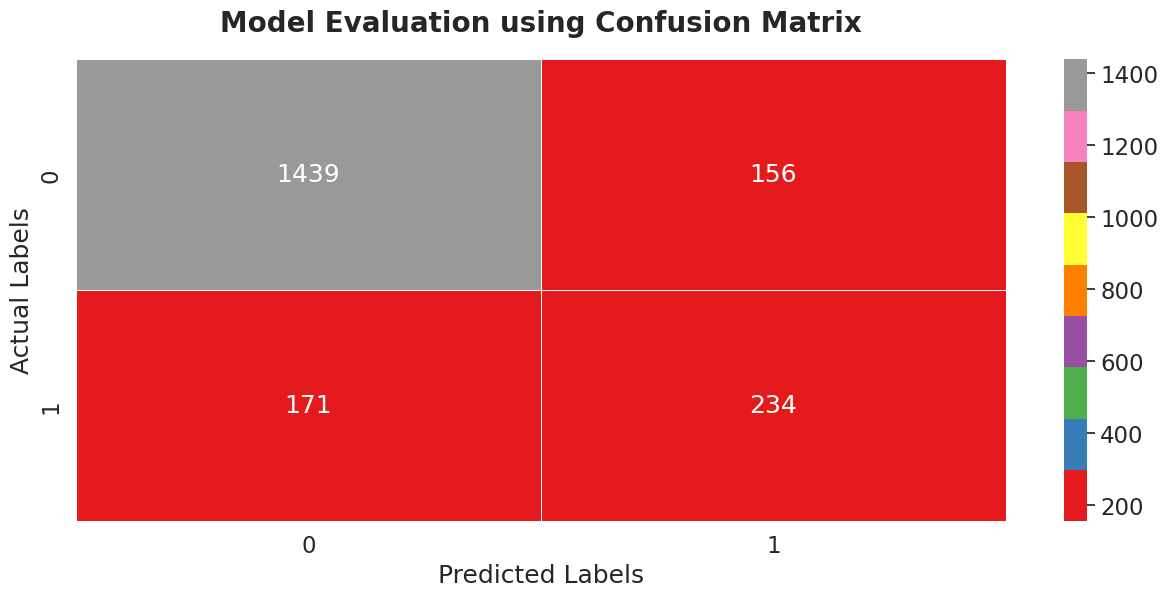

In [63]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()



<h3 align="left">Inference:</font></h3>

1. **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

    
2. **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.</div>

## Step 12.12 Model Evaluation : ROC curve and Area under the curve

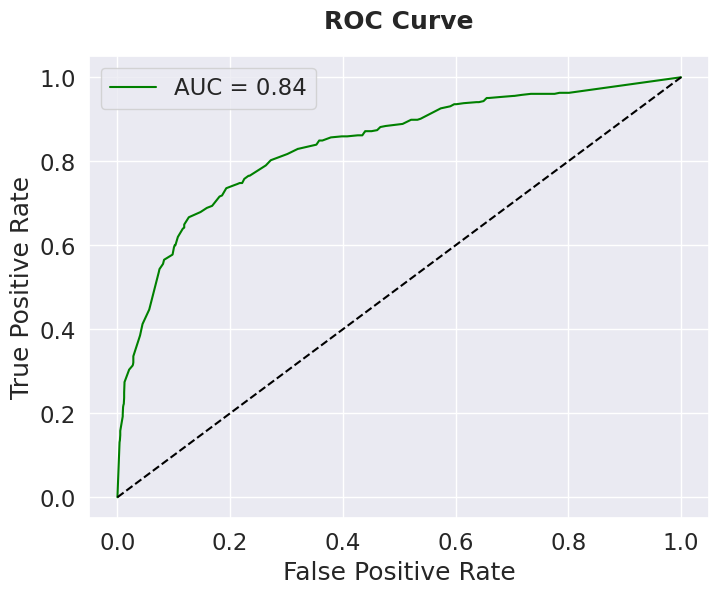

In [64]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()



<h3 align="left">Inference:</font></h3>

    
1. An **AUC (Area Under the Curve) value of 0.84** suggests that the model has **strong discriminative power.**
2. This suggests that the model has a **high ability to distinguish between positive and negative instances**, indicating its effectiveness in making accurate predictions.
3. The **model has a relatively high probability** of ranking a randomly selected positive instance higher than a randomly selected negative instance.